# Principal Component Analysis Assignment

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [2]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv')
data.head()

,gameString,gameDate,visitor,home,inning,side,balls,strikes,outs,batterId,...,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallType,battedBallAngle,battedBallDistance,paResult
0,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,0,452655,...,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN,NaN,NaN
1,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,0,452655,...,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN,NaN,NaN
2,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,2,0,452655,...,2127.17,198.816,0.389,2.266,-5.22,9.79,FB,27.78,323.03,IP_OUT
3,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,1,605412,...,1947.11,198.734,-0.004,2.380,-7.24,8.40,NaN,NaN,NaN,NaN
4,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,1,605412,...,1903.08,205.503,0.272,2.421,-6.79,9.37,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79931 entries, 0 to 79930
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gameString          79931 non-null  object 
 1   gameDate            79931 non-null  object 
 2   visitor             79931 non-null  object 
 3   home                79931 non-null  object 
 4   inning              79931 non-null  int64  
 5   side                79931 non-null  object 
 6   balls               79931 non-null  int64  
 7   strikes             79931 non-null  int64  
 8   outs                79931 non-null  int64  
 9   batterId            79931 non-null  int64  
 10  batterName          79931 non-null  object 
 11  batterHand          79931 non-null  object 
 12  batterPosition      79931 non-null  object 
 13  pitcherId           79931 non-null  int64  
 14  pitcherName         79931 non-null  object 
 15  pitcherHand         79931 non-null  object 
 16  time

### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [4]:
int_data = data.select_dtypes(exclude=['object'])
int_data

,inning,balls,strikes,outs,batterId,pitcherId,timesFaced,catcherId,umpireId,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
0,1,0,0,0,452655,503449,1,518960,427192,0.975,94.2,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN
1,1,0,1,0,452655,503449,1,518960,427192,0.745,97.1,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN
2,1,0,2,0,452655,503449,1,518960,427192,0.968,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,27.78,323.03
3,1,0,0,1,605412,503449,1,518960,427192,1.000,95.6,1947.11,198.734,-0.004,2.380,-7.24,8.40,NaN,NaN
4,1,0,1,1,605412,503449,1,518960,427192,1.000,95.6,1903.08,205.503,0.272,2.421,-6.79,9.37,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79926,9,1,1,2,475174,457732,1,542908,427315,0.989,92.5,1802.52,170.921,0.124,2.782,1.44,8.95,NaN,NaN
79927,9,1,2,2,475174,457732,1,542908,427315,0.000,93.5,1591.22,173.371,-1.577,3.571,0.92,7.85,NaN,NaN
79928,9,2,2,2,475174,457732,1,542908,427315,0.939,88.3,743.92,151.086,0.357,2.942,1.91,3.42,NaN,NaN
79929,9,2,2,2,475174,457732,1,542908,427315,0.826,93.6,2239.31,173.146,0.565,2.027,1.35,11.15,NaN,NaN


In [5]:
int_data = int_data.dropna()
int_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13438 entries, 2 to 79930
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inning              13438 non-null  int64  
 1   balls               13438 non-null  int64  
 2   strikes             13438 non-null  int64  
 3   outs                13438 non-null  int64  
 4   batterId            13438 non-null  int64  
 5   pitcherId           13438 non-null  int64  
 6   timesFaced          13438 non-null  int64  
 7   catcherId           13438 non-null  int64  
 8   umpireId            13438 non-null  int64  
 9   probCalledStrike    13438 non-null  float64
 10  releaseVelocity     13438 non-null  float64
 11  spinRate            13438 non-null  float64
 12  spinDir             13438 non-null  float64
 13  locationHoriz       13438 non-null  float64
 14  locationVert        13438 non-null  float64
 15  movementHoriz       13438 non-null  float64
 16  move

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [6]:
scaler = StandardScaler()
scaled = scaler.fit_transform(int_data)
scaled = pd.DataFrame(scaled, columns=int_data.columns)

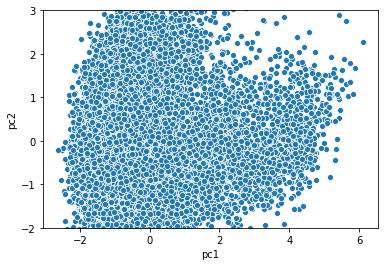

In [10]:
pca = PCA(n_components=2)
pca.fit(scaled)

pcs = pca.transform(scaled)
pcs = pd.DataFrame(pcs, columns=["pc1", "pc2"])

sns.scatterplot("pc1", "pc2", data=pcs)
plt.ylim([-2, 3])
plt.show()

### Compute the explained variance for new data set.

### Generate a scatter plot that visualizes how the component values are distributed.

### Create a line plot that shows the explained variance by number of components.

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [ ]:
model = RandomForestClassifier(max_depth=4, random_state=1)

### Create a line plot that shows the training scores across the different numbers of principal components.

### Based on the analysis you conducted, what is the optimal number of principal components?